In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

<Figure size 640x480 with 0 Axes>

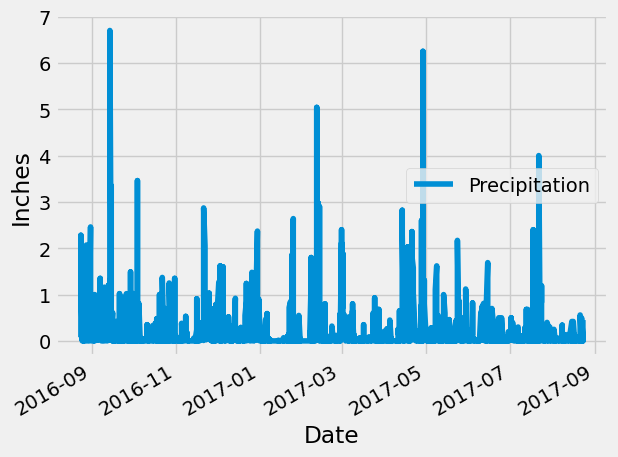

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

# Calculate the date one year from the last date in data set.
year_ago_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
precipitation_scores = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago_date).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_scores_df = pd.DataFrame(precipitation_scores, columns=['Date', 'Precipitation'])


# Sort the dataframe by date
precipitation_scores_df['Date'] = pd.to_datetime(precipitation_scores_df['Date'])
precipitation_scores_df.sort_values('Date', inplace=True)
precipitation_scores_df = precipitation_scores_df.dropna()
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure()
precipitation_scores_df.plot(x = 'Date', y = 'Precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data, and drop date column
precipitation_scores_df.drop(columns=['Date']).describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(Station).group_by(Station.station).count()

stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                               group_by(Measurement.station).\
                               order_by(func.count(Measurement.station).desc()).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stats_for_the_most_active = session.query(func.min(Measurement.tobs),
                                          func.max(Measurement.tobs),
                                          func.avg(Measurement.tobs)).\
                                          filter(Measurement.station == 'USC00519281').all()
stats_for_the_most_active

[(54.0, 85.0, 71.66378066378067)]

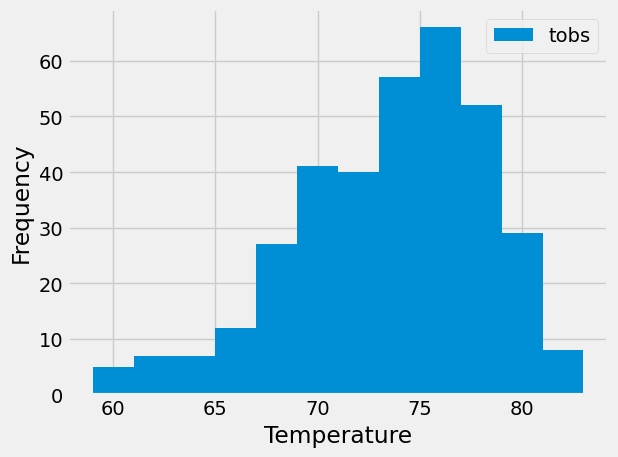

In [15]:
# Using the most active station id of 'USC00519281'
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_of_tobs_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').filter(Measurement.date >= year_ago_date).\
    order_by(Measurement.date).all()

# create dataframe
year_of_tobs_data_df = pd.DataFrame(year_of_tobs_data, columns=['date', 'tobs'])

# and plot the results as a histogram
plt.figure()
plt.hist(year_of_tobs_data_df['tobs'], bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.legend()
plt.show()
                                


# Close Session

In [16]:
# Close Session
session.close()